In [38]:
# Imports and File Paths 

# Import libraries 
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Paths to folders
train_dir = "C:/Users/Lucca/Desktop/OCT2017/train"
val_dir = "C:/Users/Lucca/Desktop/OCT2017/val"
test_dir = "C:/Users/Lucca/Desktop/OCT2017/test"

In [39]:
# Count number of files in a given folder
def get_class_counts(folder):
    """
    Returns a dictionary with class names and number of OCT pictures:
    CNV (Choroidal Neovascularization)
    DME (Diabetic Macular Edema)
    DRUSEN (Lipid and Protein Deposits)
    NORMAL (Healthy Eyes)

    Args:
        folder (str): Folder containing ocular imaging data
    
    Returns:
        dict: {class name: num_images}

    """

    classes = [c for c in os.listdir(folder) if os.path.isdir(os.path.join(folder, c))]
    # listdir lists all entires (files and folders) inside the directory folder
    # Checks the folder for subfolders and adds them to a list of folder names

    counts = {} # Dictionary to store counts and 

    for c in classes: # For each subfolder in folder
        path = os.path.join(folder, c) # New path for subfolder
        counts[c] = len(os.listdir(path)) # ie {'Normal': 1000, 'CNV' : 100}

    return counts

print("Train set count:", get_class_counts(train_dir))
print("Validation set count:", get_class_counts(val_dir))
print("Test set count:", get_class_counts(test_dir))

Train set count: {'CNV': 37205, 'DME': 11348, 'DRUSEN': 8616, 'NORMAL': 26315}
Validation set count: {'CNV': 8, 'DME': 8, 'DRUSEN': 8, 'NORMAL': 8}
Test set count: {'CNV': 242, 'DME': 242, 'DRUSEN': 242, 'NORMAL': 242}


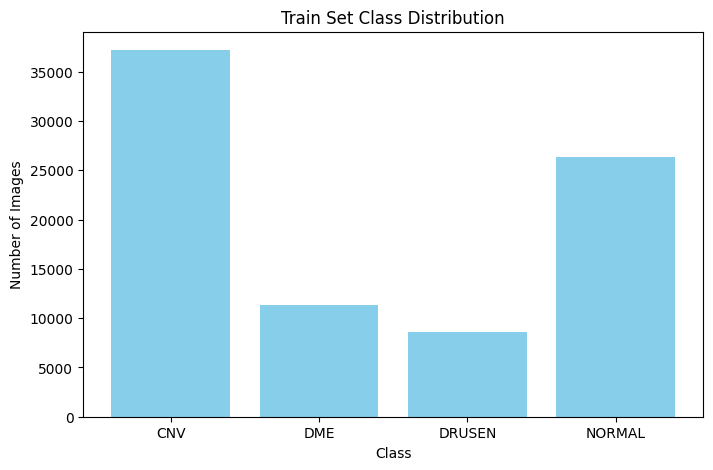

In [40]:
# Graph creation to visualize distrubution
# Reason to do this step: Visualize distrubution to identify imbalences that affects model training. 

train_counts = get_class_counts(train_dir) # Num of training images in train directory

# Plot the number of images per class for the training set
plt.figure(figsize=(8,5)) #8 in by 5 in
plt.bar(train_counts.keys(), train_counts.values(), color='skyblue') #Sets the keys(class,x) and values(num,y)
plt.title("Train Set Class Distribution") 
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


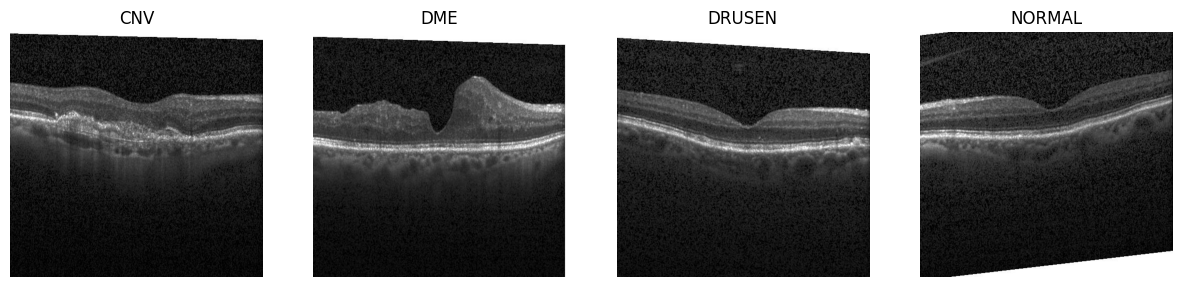

In [41]:
# Display example image
# Reason to do this: Visual inspection of the data. Shows an example to have famiiliarity with data. 

def show_sample(folder):
    """
    Displays the first image in a subfolder of folder. 

    Args:
        folder (str): Folder containing ocular imaging data

    Return:
        N/A
        
    """
    classes = [c for c in os.listdir(folder) if os.path.isdir(os.path.join(folder, c))] # Creates list of each subfolder
    plt.figure(figsize=(15,5)) # Create a 15 by 5 inch figure


    for i, c in enumerate(classes):  # For classes - i index and c class
        img_name = os.listdir(os.path.join(folder, c))[0]  # First image in subfolder
        img_path = os.path.join(folder, c, img_name) # Create directory
        img = Image.open(img_path) # Open the directory

        # Image Creation
        plt.subplot(1, len(classes), i+1)  # Creates a 1 row by 4 col grid. in plot i
        plt.imshow(img, cmap='gray') # In the current plot put image i
        plt.title(c) # Title name is the class
        plt.axis('off') # No axis
    plt.show()

show_sample(train_dir)


In [42]:
# Find image sizes
# Done to ensure consistency between all traning data

def check_image_sizes(folder):
    """
    Collects and returns all image dimensions found in the dataset folder.

    Args:
        folder (str): Folder containing ocular imaging data

    Returns:
        list: (width, height) image dimensions
    """
    classes = [c for c in os.listdir(folder) if os.path.isdir(os.path.join(folder, c))] # List of every subfolder
    sizes = [] # List of all sizes

    for c in classes: # for all subfolders
        class_folder = os.path.join(folder, c) # Directory of subfolder
        for img_name in os.listdir(class_folder): # For every image in subfolder
            img_path = os.path.join(class_folder, img_name) # Find path for image
            img = Image.open(img_path) # Open the image for processing
            sizes.append(img.size)  # Add image size in list sizes

    return sizes

# Processes sizes into list of all unqiue sizes. 
sizes = check_image_sizes(train_dir)
unique_sizes = set(sizes)

print(f"Unique image sizes in train set: {unique_sizes}")


Unique image sizes in train set: {(512, 512), (512, 496), (1024, 496), (384, 496), (1536, 496), (768, 496)}


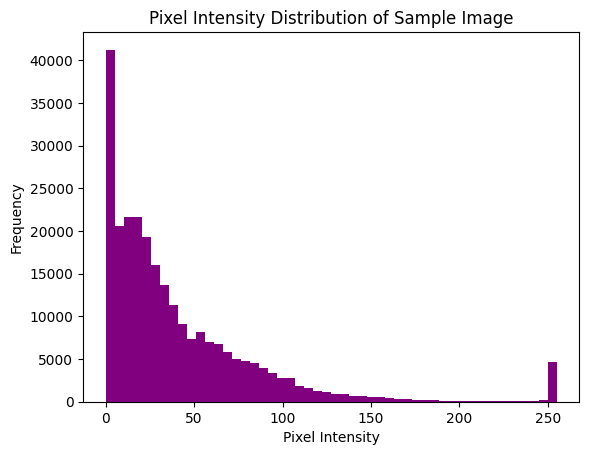

In [43]:
# Checks brightness and contrast by plotting pixel intensities.
# Select the first image in the subfolder training
sample_img_path = os.path.join(train_dir, list(train_counts.keys())[0], os.listdir(os.path.join(train_dir, list(train_counts.keys())[0]))[0])
sample_img = Image.open(sample_img_path)

# Pixel intensities into a 1D array
pixels = np.array(sample_img).flatten()

# Plot histogram of pixel intensities to understand image brightness distribution
plt.hist(pixels, bins=50, color='purple')
plt.title("Pixel Intensity Distribution of Sample Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()
